In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting beautiful graphs

import time
from sklearn.metrics import classification_report

# Import Torch 
import torch
from torch.utils.data import random_split
from torch.autograd import Variable as var
from torch import nn
from torch.optim import Adam
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

# import the necessary packages
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

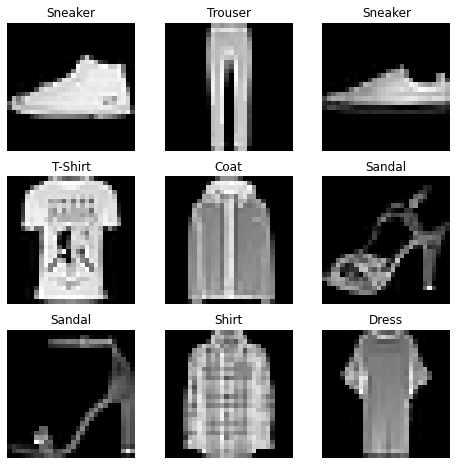

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Below, a custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.

In the next sections, we’ll break down what’s happening in each of these functions.

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


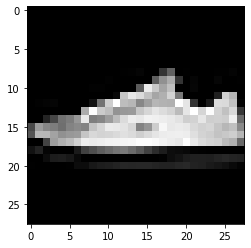

Label: 7


In [7]:
# visualize one of the images in data set
def visualize_image(data, index, pred=False, val=0):
    '''This funtion can be used to visualize the images'''
    sample_idx = torch.randint(len(data), size=(1,)).item()
    train_features, train_labels = next(iter(train_dataloader))
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"Label: {label}")
visualize_image(train_dataloader, 13)

https://towardsdatascience.com/three-ways-to-build-a-neural-network-in-pytorch-8cea49f9a61a

https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Conv1d(28*28, 512, kernel_size=(5, 5))
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

In [4]:
class Model(nn.Module):
    def __init__(self, numChannels, classes):
        super().__init__()
        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = Conv2d(in_channels=numChannels, out_channels=32,
        kernel_size=(5, 5))
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # initialize second set of CONV => RELU => POOL layers
        self.conv2 = Conv2d(in_channels=32, out_channels=20,
        kernel_size=(5, 5))
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # intialize set of fc => ReLU layer
        self.fc1 = Linear(in_features=800, out_features=500)
        self.relu3 = ReLU()
        # initialize LogSoftMaxClassifier
        self.fc2 = Linear(in_features=500, out_features=classes)
        self.logSoftMax = LogSoftmax(dim=1)
    
    def forward(self, x):
        # pass to the first set of CONV=>RELU=>POOL layers
        x = self.conv1
        x = self.relu1
        x = self.maxpool1

        # pass to the first set of CONV=>RELU=>POOL layers
        x = self.conv2
        x = self.relu2
        x = self.maxpool2
        
        # flatten and pass it to the fc => RELU layers
        # x = flatten(x, 1)
        x = self.fc1
        x = self.relu3
        # pass it to the classifier to get our prediction
        x = self.fc2
        output = self.logSoftMax
        return output

NameError: name 'nn' is not defined

- **Module** : Rather than using the Sequential PyTorch class to implement LeNet, we’ll instead subclass the Module
object so you can see how PyTorch implements neural networks using classes
- **Conv2d** : PyTorch’s implementation of convolutional layers 
- **Linear** : Fully connected layers
- **MaxPool2d** : Applies 2D max-pooling to reduce the spatial dimensions of the input volume
- **ReLU** : Our ReLU activation function
- **LogSoftmax** : Used when building our softmax classifier to return the predicted probabilities of each class
- **flatten** : Flattens the output of a multi-dimensional volume (e.g., a CONV or POOL layer) such that we can apply fully connected layers to it

In [10]:
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] training the network...


In [11]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = int(len(training_data) * TRAIN_SPLIT)
numValSamples = int(len(training_data) * VAL_SPLIT)
(trainData, valData) = random_split(training_data,
	[numTrainSamples, numValSamples],
	generator=torch.Generator().manual_seed(42))

[INFO] generating the train/validation split...


We have three sets of data: train, validation, test

Let's divide our precedent dataloader between train and validation

In [13]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(trainData, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(test_data, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [14]:
model = Model(numChannels=1, classes= len(training_data.classes))
# model = Classifier()

# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
numepch = 3

# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}

In [15]:
# loop over our epochs
for e in range(0, EPOCHS):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for (x, y) in trainDataLoader:
		# send the input to the device
		(x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = lossFn(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		opt.zero_grad()
		loss.backward()
		opt.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
		trainCorrect += (pred.argmax(1) == y).type(
			torch.float).sum().item()

TypeError: nll_loss_nd(): argument 'input' (position 1) must be Tensor, not LogSoftmax

In [16]:
# Instantiate our model
model = Classifier()
# Define our loss function
criterion = nn.NLLLoss()
# Define the optimier
optimizer = Adam(model.parameters(), lr=0.0015)

epochs = 25
steps = 0
print_every = 50
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
        steps += 1
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                model.eval()
                for images, labels in test_dataloader:
                    log_ps = model(images)
                    test_loss += criterion(log_ps, labels)

                    ps = torch.exp(log_ps)
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            model.train()

            train_losses.append(running_loss/len(train_dataloader))
            test_losses.append(test_loss/len(test_dataloader))

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                  "Test Loss: {:.3f}.. ".format(test_losses[-1]),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_dataloader)))

RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [64, 1, 28, 28]